# Data discovery
This file has some visualisation about not processed and processed database

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

## Raw
This section focuses on unprocessed database coming right from the website

In [7]:
df = pd.read_csv("fashion\\fashion.csv", sep=";")
df.set_index("id", inplace=True)

### Data appearance

In [8]:
df.head(5)

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
id,,,,,,,,,
15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### Columns that will be used for target column

In [57]:
df.masterCategory.value_counts()

masterCategory
Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

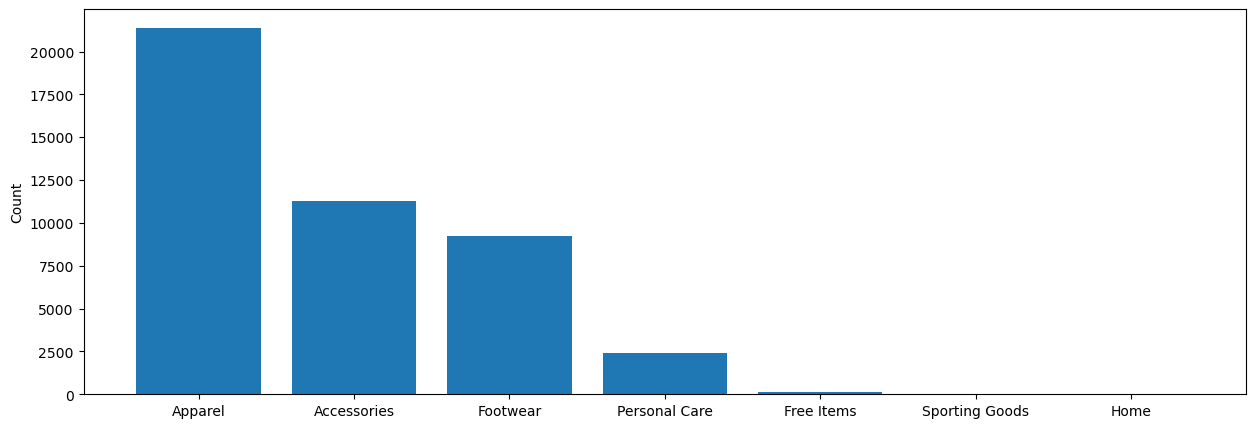

In [44]:
s = df.masterCategory.value_counts()
plt.figure(figsize=(15,5))
plt.bar(df.masterCategory.unique(), s)
plt.ylabel("Count")
plt.show()

I want the model to be more specific regarding category Apparel. In processed database, from category Apparel I get values where subcategory is Topwear and Bottowear 

In [58]:
df.subCategory.value_counts()

subCategory
Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

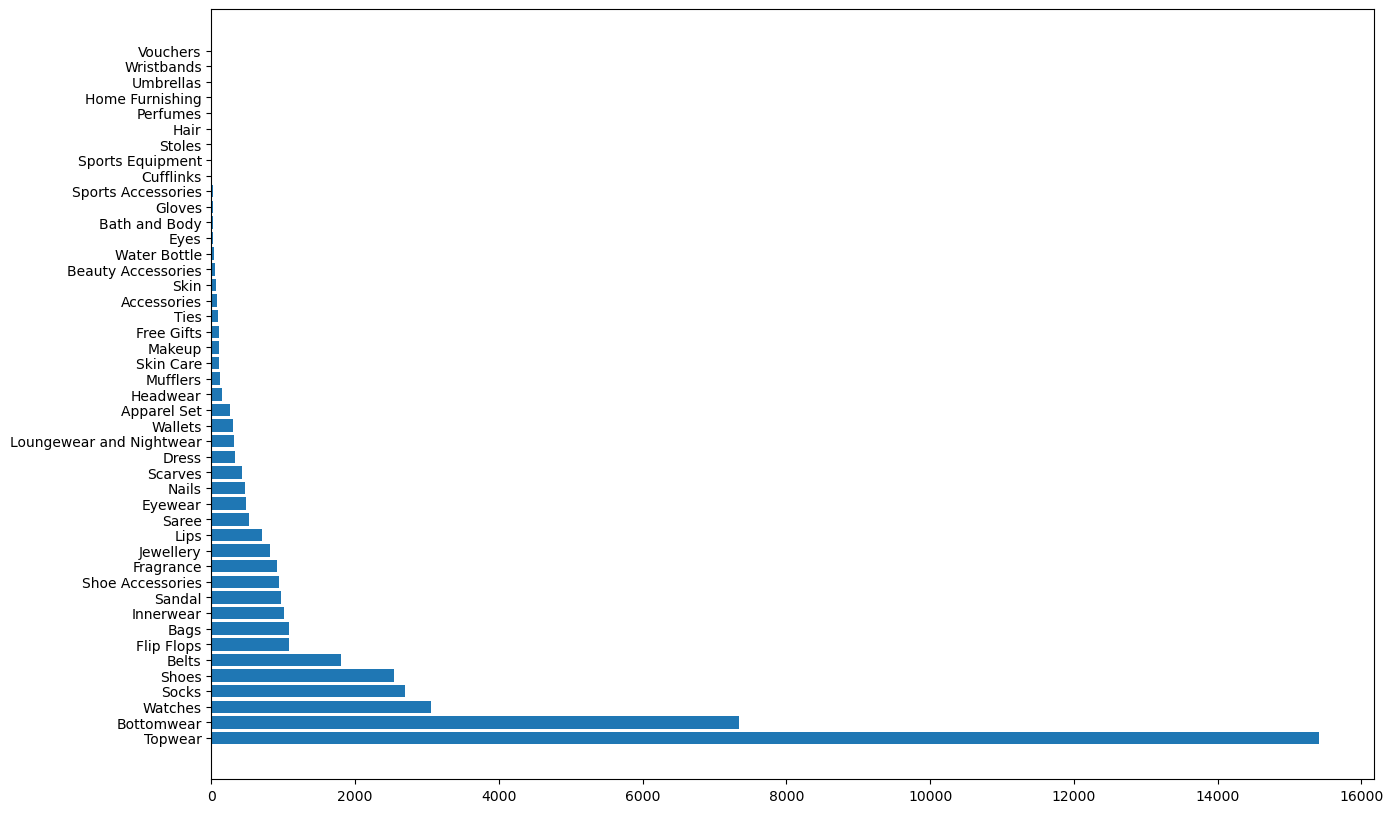

In [54]:
s = df.subCategory.value_counts()
plt.figure(figsize=(15,10))
plt.barh(df.subCategory.unique(), s)
plt.show()

It's visible that targets won't be equally distributed proving the dataset more realistic. It's not a unnaturally perfect dataset where each class has simillar number of samples.  

## Processed
This section loads processed dataset. It was processed in DatabaseProcessing

In [60]:
df = pd.read_csv("cleaned_fashion.csv", sep=';')
df.set_index("id", inplace=True)

In [61]:
df.head(5)

,target
id,
15970,Topwear
39386,Bottomwear
59263,Accessories
21379,Bottomwear
53759,Topwear


In [62]:
df.describe()

,target
count,41121
unique,8
top,Topwear
freq,15398


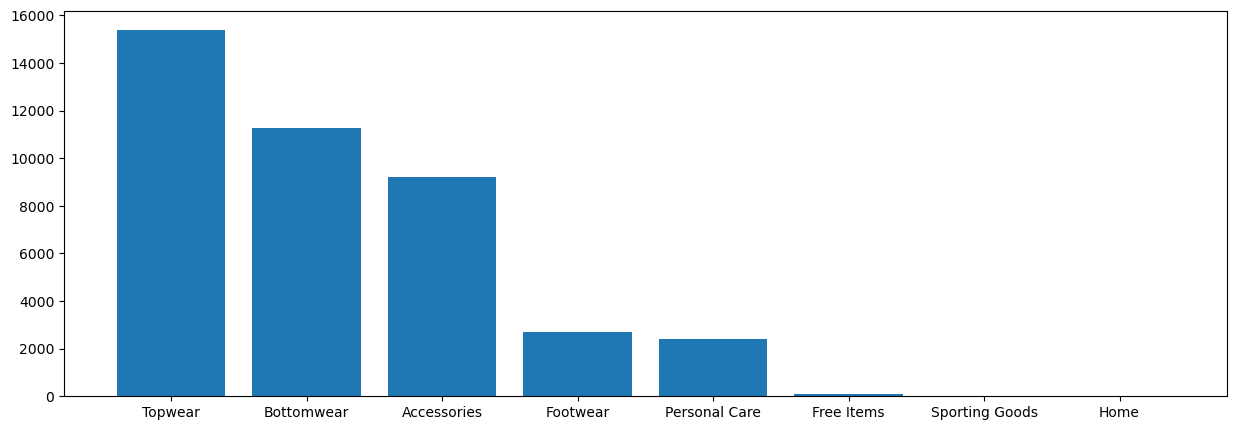

In [64]:
s = df.target.value_counts()
plt.figure(figsize=(15,5))
plt.bar(df.target.unique(), s)
plt.show()